### Fase 1: Exploración y Limpieza

**1. Exploración Inicial**

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

`Lectura de archivos`

In [3]:
#Apertura archivo 1
df_cust_flight= pd.read_csv("customer_flight_activity.csv")

pd.set_option('display.max_columns', None)

# 5 primeras filas del data frame

df_cust_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
#Apertura archivo 2
df_cust_loyal= pd.read_csv("customer_loyalty_history.csv")

pd.set_option('display.max_columns', None)

# 5 primeras filas del data frame

df_cust_loyal.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


`Exploración general de archivos`

In [14]:
# Exploración detallada vuelos realizados por clientes
print('Análisis general de CUSTOMER FLIGHT \n')
print(df_cust_flight.info())
print('\n----------------------\n')

# Cantidad de columnas y filas 
print(f"El número de filas que tenemos en customer_flight son : {df_cust_flight.shape[0]}, y el número de columnas es: {df_cust_flight.shape[1]}")
print('\n----------------------\n')

# Columnas numéricas y catégoricas 
print(f"Las columnas numéricas son:{df_cust_flight.select_dtypes(include = np.number).columns}")
print('\n----------------------\n')
print(f"Las columnas categóricas son:{df_cust_flight.select_dtypes(include = "O").columns}")
print('\n----------------------\n')

# Nulos Categóricas 
nulos_cat = df_cust_flight[df_cust_flight.columns[df_cust_flight.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_cat)

# Nulos Numéricos
nulos_num = df_cust_flight[df_cust_flight.columns[df_cust_flight.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_num)

Análisis general de CUSTOMER FLIGHT 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
None

----------------------

El número de filas que tenemos en customer_flight son : 405624

*Se observa:*
- En la exploración inicial de "Customer Flight Analysis"se identifica que no hay nulos y todos son number.

- Se puede hacer cambio de tipo de dato a int de Points Accumulated

In [15]:
# Exploración detallada información de clientes
print('Análisis general de CUSTOMER LOYALTY \n')
print(df_cust_loyal.info())
print('\n----------------------\n')

# Cantidad de columnas y filas 
print(f"El número de filas que tenemos en customer_flight son : {df_cust_loyal.shape[0]}, y el número de columnas es: {df_cust_loyal.shape[1]}")
print('\n----------------------\n')

# Columnas numéricas y catégoricas 
print(f"Las columnas numéricas son:{df_cust_loyal.select_dtypes(include = np.number).columns}")
print('\n----------------------\n')
print(f"Las columnas categóricas son:{df_cust_loyal.select_dtypes(include = "O").columns}")
print('\n----------------------\n')

# Nulos Categóricas 
nulos_cat = df_cust_loyal[df_cust_loyal.columns[df_cust_loyal.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_cat)

# Nulos Numéricos
nulos_num = df_cust_loyal[df_cust_loyal.columns[df_cust_loyal.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_num)

Análisis general de CUSTOMER LOYALTY 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation M

*Se oberva:*
- Datos nulos para columnas numéricas: ['Salary', 'Cancellation Year', 'Cancellation Month']

- Cancellation Month, Cancellation Year, Salary - podría cambiarse a tipo de dato int

`Conformación de los datos`

- Customer flight

In [23]:
for col in df_cust_flight.columns:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_cust_flight[col].value_counts() / df_cust_flight.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna LOYALTY NUMBER


Loyalty Number
678205    0.000178
989528    0.000118
373638    0.000118
684889    0.000118
684881    0.000118
            ...   
428526    0.000059
428536    0.000059
428565    0.000059
428590    0.000059
999891    0.000059
Name: count, Length: 16737, dtype: float64

........................
La distribución de las categorías para la columna YEAR


Year
2017    0.5
2018    0.5
Name: count, dtype: float64

........................
La distribución de las categorías para la columna MONTH


Month
1     0.083333
9     0.083333
2     0.083333
3     0.083333
11    0.083333
4     0.083333
5     0.083333
7     0.083333
6     0.083333
8     0.083333
10    0.083333
12    0.083333
Name: count, dtype: float64

........................
La distribución de las categorías para la columna FLIGHTS BOOKED


Flights Booked
0     0.488117
3     0.044938
11    0.038718
5     0.037187
7     0.035898
8     0.035395
9     0.034919
6     0.034138
2     0.033630
10    0.032944
4     0.031608
1     0.031228
13    0.026581
12    0.025595
14    0.017398
15    0.016227
16    0.010734
17    0.009612
18    0.007292
19    0.003688
20    0.002850
21    0.001302
Name: count, dtype: float64

........................
La distribución de las categorías para la columna FLIGHTS WITH COMPANIONS


Flights with Companions
0     0.731927
2     0.047512
3     0.046878
1     0.044142
4     0.033689
5     0.033095
6     0.024434
7     0.017477
8     0.009775
9     0.007258
10    0.002640
11    0.001174
Name: count, dtype: float64

........................
La distribución de las categorías para la columna TOTAL FLIGHTS


Total Flights
0     0.488117
6     0.037653
10    0.035484
8     0.034653
4     0.033667
2     0.032128
12    0.030592
11    0.030324
9     0.026350
13    0.025884
14    0.025418
7     0.024340
3     0.024118
5     0.022950
15    0.021064
16    0.019050
17    0.015280
1     0.015053
18    0.014193
19    0.009866
20    0.008424
21    0.006435
22    0.004884
23    0.003984
24    0.002981
25    0.002219
26    0.001780
27    0.001243
28    0.000754
29    0.000528
30    0.000370
31    0.000150
32    0.000067
Name: count, dtype: float64

........................
La distribución de las categorías para la columna DISTANCE


Distance
0       0.488117
2520    0.001011
2880    0.000989
1680    0.000959
2160    0.000900
          ...   
1333    0.000002
3722    0.000002
3985    0.000002
4779    0.000002
4135    0.000002
Name: count, Length: 4746, dtype: float64

........................
La distribución de las categorías para la columna POINTS ACCUMULATED


Points Accumulated
0.00      0.488117
180.00    0.001881
270.00    0.001810
288.00    0.001768
189.00    0.001748
            ...   
658.50    0.000002
556.25    0.000002
10.80     0.000002
565.50    0.000002
626.00    0.000002
Name: count, Length: 1549, dtype: float64

........................
La distribución de las categorías para la columna POINTS REDEEMED


Points Redeemed
0      0.940386
447    0.000254
523    0.000247
443    0.000242
516    0.000239
         ...   
834    0.000002
858    0.000002
862    0.000002
869    0.000002
859    0.000002
Name: count, Length: 587, dtype: float64

........................
La distribución de las categorías para la columna DOLLAR COST POINTS REDEEMED


Dollar Cost Points Redeemed
0     0.940386
36    0.002557
38    0.002468
40    0.002448
42    0.002423
39    0.002325
44    0.002276
41    0.002251
37    0.002187
43    0.002162
35    0.002100
34    0.002081
32    0.002014
33    0.001972
45    0.001920
30    0.001903
46    0.001856
31    0.001780
47    0.001664
48    0.001573
28    0.001474
29    0.001469
50    0.001467
49    0.001400
52    0.001188
51    0.001072
27    0.001038
54    0.000991
26    0.000934
53    0.000929
56    0.000900
55    0.000846
57    0.000676
58    0.000653
60    0.000641
59    0.000540
25    0.000515
61    0.000431
63    0.000431
62    0.000382
64    0.000375
24    0.000271
66    0.000261
65    0.000222
68    0.000210
67    0.000168
70    0.000094
69    0.000069
71    0.000005
Name: count, dtype: float64

........................


- **Customer loyalty**

In [24]:
for col in df_cust_loyal.columns:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_cust_loyal[col].value_counts() / df_cust_loyal.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna LOYALTY NUMBER


Loyalty Number
480934    0.00006
208485    0.00006
455896    0.00006
469781    0.00006
533488    0.00006
           ...   
922188    0.00006
780529    0.00006
721438    0.00006
761015    0.00006
652627    0.00006
Name: count, Length: 16737, dtype: float64

........................
La distribución de las categorías para la columna COUNTRY


Country
Canada    1.0
Name: count, dtype: float64

........................
La distribución de las categorías para la columna PROVINCE


Province
Ontario                 0.322877
British Columbia        0.263428
Quebec                  0.197168
Alberta                 0.057896
Manitoba                0.039314
New Brunswick           0.038000
Nova Scotia             0.030949
Saskatchewan            0.024437
Newfoundland            0.015415
Yukon                   0.006572
Prince Edward Island    0.003943
Name: count, dtype: float64

........................
La distribución de las categorías para la columna CITY


City
Toronto           0.200215
Vancouver         0.154269
Montreal          0.123021
Winnipeg          0.039314
Whistler          0.034773
Halifax           0.030949
Ottawa            0.030412
Trenton           0.029037
Edmonton          0.029037
Quebec City       0.028978
Dawson Creek      0.026528
Fredericton       0.025393
Regina            0.024437
Kingston          0.023959
Tremblant         0.023780
Victoria          0.023242
Hull              0.021390
West Vancouver    0.019358
St. John's        0.015415
Thunder Bay       0.015295
Sudbury           0.013563
Moncton           0.012607
Calgary           0.011412
Banff             0.010695
London            0.010396
Peace River       0.006752
Whitehorse        0.006572
Kelowna           0.005258
Charlottetown     0.003943
Name: count, dtype: float64

........................
La distribución de las categorías para la columna POSTAL CODE


Postal Code
V6E 3D9    0.054430
V5R 1W3    0.040868
V6T 1Y8    0.034773
V6E 3Z3    0.032503
M2M 7K8    0.031905
P1J 8T7    0.029874
H2T 9K8    0.029814
K8V 4B2    0.029037
G1B 3L5    0.028978
H2T 2J6    0.026648
U5I 4F1    0.026528
V1E 4R6    0.026468
E3B 2H2    0.025393
R2C 0M5    0.024795
M9K 2P4    0.023959
H5Y 2S9    0.023780
V10 6T5    0.023242
K1F 2R2    0.023242
H2Y 2W2    0.021808
J8Y 3Z5    0.021390
M8Y 4K8    0.020314
H4G 3T4    0.020195
B3J 9S2    0.019657
V6V 8Z3    0.019358
P2T 6G3    0.019239
H2Y 4R4    0.018821
M1R 4K3    0.018701
P1L 8X8    0.016849
P1W 1K4    0.016431
T9G 1W3    0.015893
A1C 6H9    0.015415
M2Z 4K1    0.015355
K8T 5M5    0.015295
P5S 6R4    0.014698
M5V 1G5    0.013563
S6J 3G0    0.013503
T3G 6Y6    0.013145
E1A 2A7    0.012607
T3E 2V9    0.011412
B3C 2M8    0.011292
S1J 3C5    0.010934
T4V 1D4    0.010695
M5B 3E4    0.010396
M2M 6J7    0.009141
R6Y 4T5    0.008544
M2P 4F6    0.007528
K1G 4Z0    0.007170
T9O 2W2    0.006752
Y2K 6R0    0.006572
R3R 3T4 

........................
La distribución de las categorías para la columna GENDER


Gender
Female    0.50248
Male      0.49752
Name: count, dtype: float64

........................
La distribución de las categorías para la columna EDUCATION


Education
Bachelor                0.625859
College                 0.253211
High School or Below    0.046723
Doctor                  0.043855
Master                  0.030352
Name: count, dtype: float64

........................
La distribución de las categorías para la columna SALARY


Salary
 101933.0    0.001374
 62283.0     0.000836
 61809.0     0.000836
 51573.0     0.000836
 64001.0     0.000777
               ...   
 95907.0     0.000060
 72440.0     0.000060
 88633.0     0.000060
 100572.0    0.000060
-57297.0     0.000060
Name: count, Length: 5890, dtype: float64

........................
La distribución de las categorías para la columna MARITAL STATUS


Marital Status
Married     0.581645
Single      0.267909
Divorced    0.150445
Name: count, dtype: float64

........................
La distribución de las categorías para la columna LOYALTY CARD


Loyalty Card
Star      0.456294
Nova      0.338830
Aurora    0.204875
Name: count, dtype: float64

........................
La distribución de las categorías para la columna CLV


CLV
8564.77     0.000777
13024.13    0.000717
3808.12     0.000717
2359.42     0.000717
3731.50     0.000717
              ...   
16152.90    0.000060
5204.65     0.000060
5620.59     0.000060
5205.02     0.000060
61134.68    0.000060
Name: count, Length: 7984, dtype: float64

........................
La distribución de las categorías para la columna ENROLLMENT TYPE


Enrollment Type
Standard          0.941985
2018 Promotion    0.058015
Name: count, dtype: float64

........................
La distribución de las categorías para la columna ENROLLMENT YEAR


Enrollment Year
2018    0.179841
2017    0.148593
2016    0.146741
2013    0.143216
2014    0.141602
2015    0.139272
2012    0.100735
Name: count, dtype: float64

........................
La distribución de las categorías para la columna ENROLLMENT MONTH


Enrollment Month
5     0.089801
12    0.088427
7     0.088009
11    0.086395
10    0.086276
8     0.085439
6     0.084364
9     0.083109
4     0.082930
3     0.081138
2     0.072892
1     0.071219
Name: count, dtype: float64

........................
La distribución de las categorías para la columna CANCELLATION YEAR


Cancellation Year
2018.0    0.038537
2017.0    0.030232
2016.0    0.025512
2015.0    0.015833
2014.0    0.010814
2013.0    0.002569
Name: count, dtype: float64

........................
La distribución de las categorías para la columna CANCELLATION MONTH


Cancellation Month
12.0    0.012726
11.0    0.012667
8.0     0.012428
7.0     0.011113
10.0    0.010755
9.0     0.010516
6.0     0.009858
1.0     0.009261
3.0     0.008902
5.0     0.008843
2.0     0.008305
4.0     0.008126
Name: count, dtype: float64

........................


`Principales datos estadísticos`

- **Customer flight**

In [19]:
df_cust_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


- *Análisis*:

    - Total Flights: tiene una desviación estandar significativa, y viendo el valor max, y la mdiana se puede decir que hay muchos valores atípicos 

- **Customer loyalty**

In [21]:
# Variables numéricas
df_cust_loyal.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


- *Análisis*:

    - Salary: tiene una desviación estandar significativa, y viendo el valor max y min encontramos que es una columna donde puede tener outliers. Requiere cambiar valores a positivo
    - Revisando datos con nulos, se podría pensar que Cancellation Year' y 'Cancellation Month', se puedan gestionar con la media, ya que no presenta min y max fuera del tipo de dato esperado.

In [22]:
# Variables catégoricas
df_cust_loyal.describe(include = "object").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


`Datos atípicos`

**- Customer flight**

In [47]:
columnas_num= df_cust_flight.select_dtypes(include = np.number).columns.tolist()
columnas_num


['Loyalty Number',
 'Year',
 'Month',
 'Flights Booked',
 'Flights with Companions',
 'Total Flights',
 'Distance',
 'Points Accumulated',
 'Points Redeemed',
 'Dollar Cost Points Redeemed']

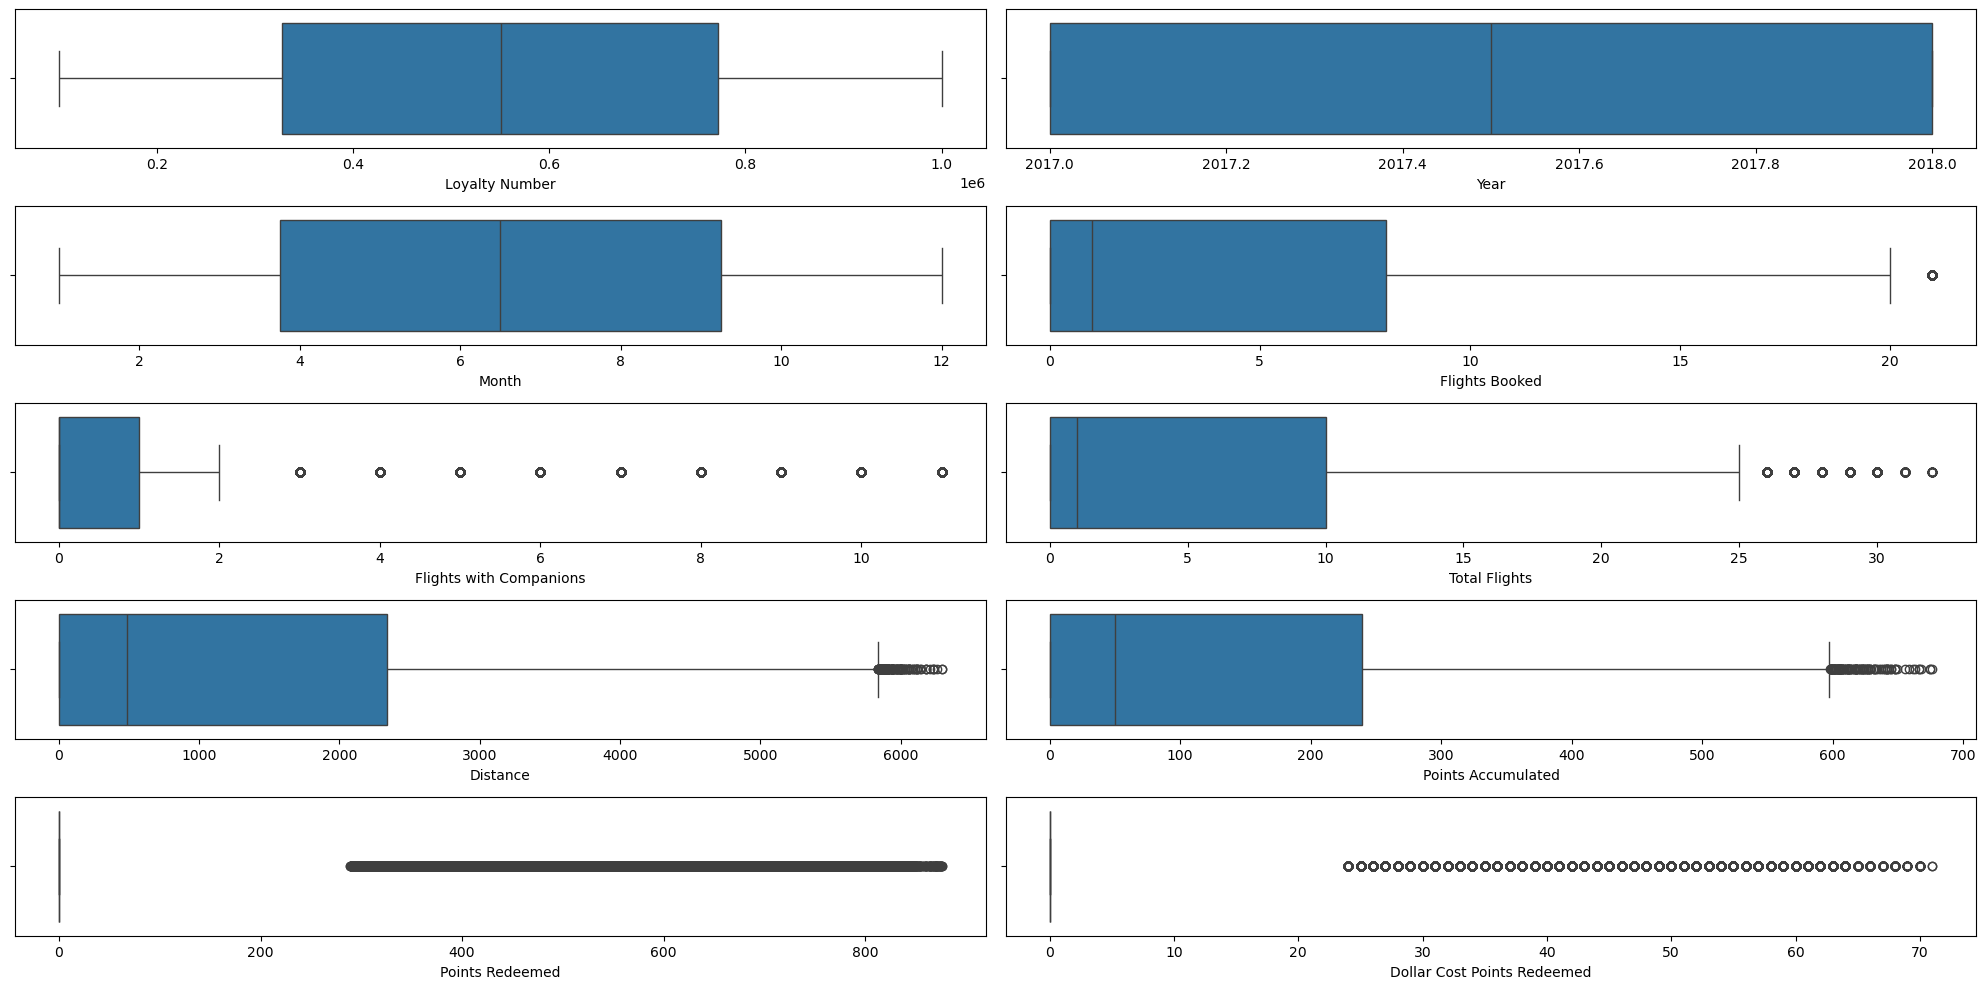

In [48]:
#Valores atipicos o outliers


fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(columnas_num):
    sns.boxplot(x = col, data =df_cust_flight, ax = axes[indice])
    
plt.tight_layout();

*Análisis:*
- Tenemos una cantidad de datos atipicos en algunas de las categorías. Si bien esto no representa un problema significativo al no tener datos nulos. Es importante considerarlo en términos estadísticos y como puede estar influyendo en la media de algunas variables

**- Customer loyalty**

In [49]:
columnas_num= df_cust_loyal.select_dtypes(include = np.number).columns.tolist()
columnas_num

['Loyalty Number',
 'Salary',
 'CLV',
 'Enrollment Year',
 'Enrollment Month',
 'Cancellation Year',
 'Cancellation Month']

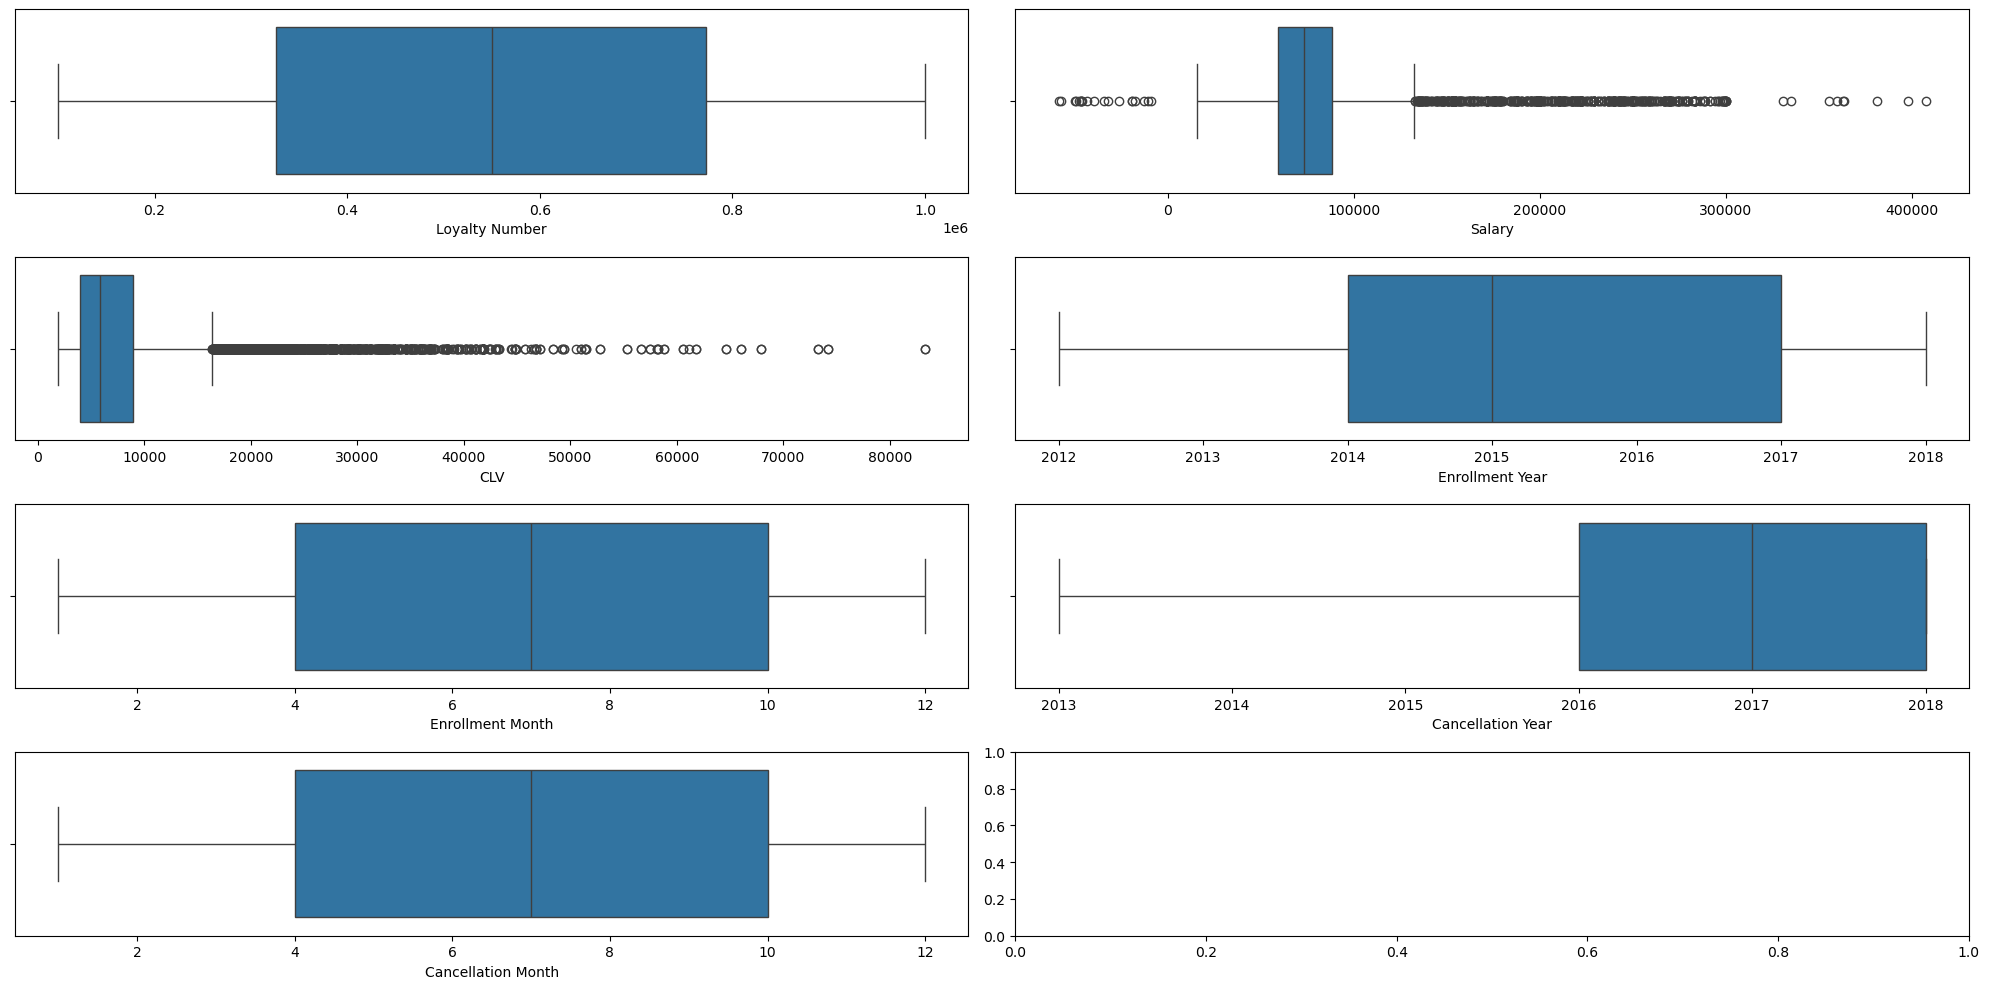

In [50]:
#Valores atipicos o outliers


fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(columnas_num):
    sns.boxplot(x = col, data =df_cust_loyal, ax = axes[indice])
    
plt.tight_layout();

**Limpieza de datos**

- Quitar espacios de las columnas 
- En la columna salary tenemos algunos datos negativos
- Enrollment Type: 2018 Promotion, elimimar 2018
- cambiar espacios por guion bajo en los datos 
- customer flight, el year debe quitarse los valores correspondientes a 2017.5, 